In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

### Question 1
Simulate the growth of a species population with constant growth rate $r = 0.1$ and an initial value of 10.  
* Then perform new simulations for values of the initial population of 50 and 100 respectively.  
* Plot all curves on the same graph and interpret the results.

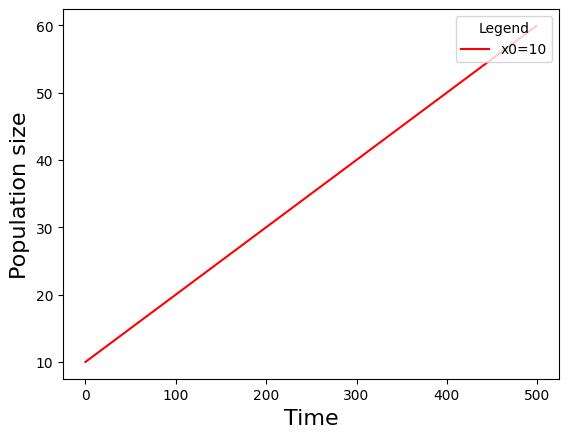

In [3]:
def growth(t, x0, r):
    dxdt = r
    return [dxdt]

r = 0.1                     # Growth rate
Tmax = 500                  # Maximum time
t_span = (0, Tmax)          # Time span of the simulation
t = np.arange(0, Tmax, 1)   # Times at which to store the solution

x0 = [10]                   # Initial value of the population
pop1 = solve_ivp(growth, t_span, x0, args=[r], t_eval=t)

plt.plot(pop1.t, pop1.y[0], 'r', label="x0=10")

plt.xlabel("Time", fontsize=16)
plt.ylabel("Population size", fontsize=16)
plt.legend(loc='upper right', title="Legend")

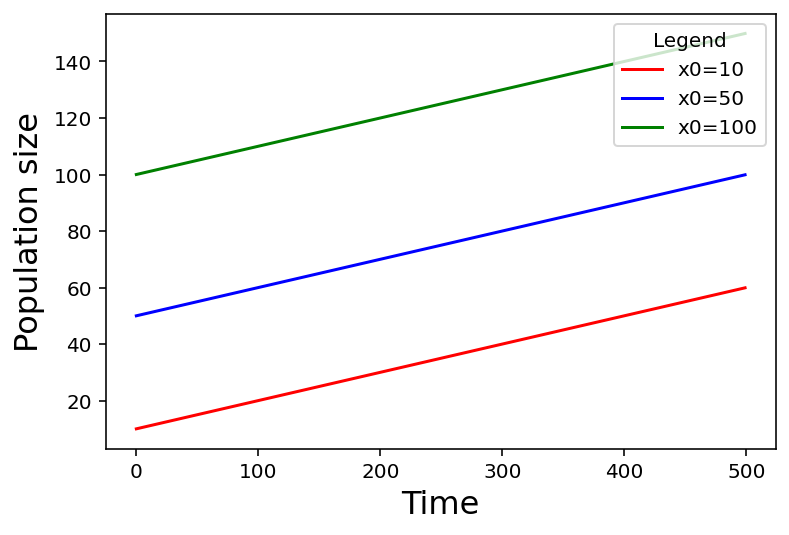

In [8]:
def growth(t, x0, r):
    dxdt = r
    return [dxdt]

r = 0.1                     # Growth rate
Tmax = 500                  # Maximum time
t_span = (0, Tmax)          # Time span of the simulation
t = np.arange(0, Tmax, 1)   # Times at which to store the solution

x0 = [10]                   # Initial value of the population
pop1 = solve_ivp(growth, t_span, x0, args=[r], t_eval=t)
x0 = [50]
pop2 = solve_ivp(growth, t_span, x0, args=[r], t_eval=t)
x0 = [100]
pop3 = solve_ivp(growth, t_span, x0, args=[r], t_eval=t)

plt.plot(pop1.t, pop1.y[0], 'r', label="x0=10")
plt.plot(pop2.t, pop2.y[0], 'b', label="x0=50")
plt.plot(pop3.t, pop3.y[0], 'g', label="x0=100")

plt.xlabel("Time", fontsize=16)
plt.ylabel("Population size", fontsize=16)
plt.legend(loc='upper right', title="Legend")

These results show that population sizes with a higher population size grow to a higher population size. However, all populations are growing at the same rate


### Question 2
Modify the growth function to simulate a population that increases proportionally to its own size, as in the following equation:$$\frac{dx(t)}{dt}=r \cdot x(t)$$  
* Run simulations for $r=0.01$ and initial populations of 10, 50 and 100 respectively.  
* Plot all curves on the same graph and interpret the results.

The Half Life is: -69.31471805599453


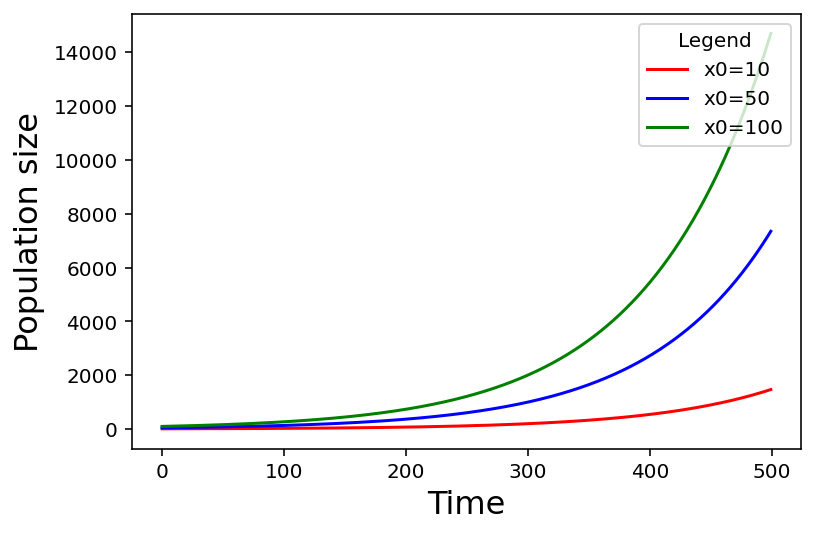

In [20]:
import math
def growth(t, x0, r):
    dxdt = r * x0
    return [dxdt]

r = 0.01                     # Growth rate
Tmax = 500                  # Maximum time
t_span = (0, Tmax)          # Time span of the simulation
t = np.arange(0, Tmax, 1)   # Times at which to store the solution

x0 = [10]                   # Initial value of the population
pop1 = solve_ivp(growth, t_span, x0, args=[r], t_eval=t)
x0 = [50]
pop2 = solve_ivp(growth, t_span, x0, args=[r], t_eval=t)
x0 = [100]
pop3 = solve_ivp(growth, t_span, x0, args=[r], t_eval=t)


plt.plot(pop1.t, pop1.y[0], 'r', label="x0=10")
plt.plot(pop2.t, pop2.y[0], 'b', label="x0=50")
plt.plot(pop3.t, pop3.y[0], 'g', label="x0=100")

plt.xlabel("Time", fontsize=16)
plt.ylabel("Population size", fontsize=16)
plt.legend(loc='upper right', title="Legend")


These results show that larger population sizes increase at a greater rate than smaller population sizes


### Question 3
We can use the same equation to model mRNA decay, but this time $r$ will be a negative value and should be interpreted as a degradation rate.
* Plot solutions for an initial value of 100 and degradation rates of 0.1, 0.01 and 0.001 respectively.
* Calculate the half-life for each of these simulations.

The Half Life when r = -0.1: 6.931471805599452
The Half Life when r = -0.01: 69.31471805599453
The Half Life when r = -0.001: 693.1471805599452


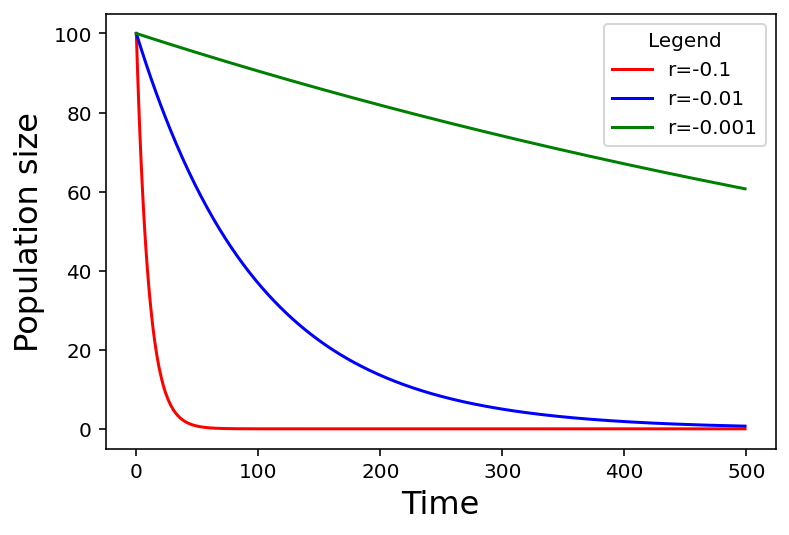

In [22]:
def growth(t, x0, r):
    dxdt = r * x0
    return [dxdt]

x0 = [100] # Initial value of the population
Tmax = 500                  # Maximum time
t_span = (0, Tmax)          # Time span of the simulation
t = np.arange(0, Tmax, 1)   # Times at which to store the solution

r = -0.1                     # Growth rate                
pop1 = solve_ivp(growth, t_span, x0, args=[r], t_eval=t)
print("The Half Life when r = -0.1:", -math.log(2)/r )
r = -0.01
pop2 = solve_ivp(growth, t_span, x0, args=[r], t_eval=t)
print("The Half Life when r = -0.01:", -math.log(2)/r )
r = -0.001
pop3 = solve_ivp(growth, t_span, x0, args=[r], t_eval=t)
print("The Half Life when r = -0.001:", -math.log(2)/r )

plt.plot(pop1.t, pop1.y[0], 'r', label="r=-0.1")
plt.plot(pop2.t, pop2.y[0], 'b', label="r=-0.01")
plt.plot(pop3.t, pop3.y[0], 'g', label="r=-0.001")

plt.xlabel("Time", fontsize=16)
plt.ylabel("Population size", fontsize=16)
plt.legend(loc='upper right', title="Legend")


### Question 4

Exponential decay alone is not very insightful, but when combined with other terms it can be more useful to model gene transcription:
$$
\frac{dx(t)}{dt}=k-d\cdot x(t)
$$
This equation describes the production and degradation of an mRNA species. The production is assumed to be constant with a rate $k$, and $d$ is the degradation rate.

* Plot solutions for $k=3$ and degradation rates of 0.1, 0.01 and 0.001 respectively.
* Calculate the steady state for each of these simulations.



The steady state when d=0.1 is: 30.0
The steady state when d=0.01 is: 300.0
The steady state when d=0.001 is: 3000.0


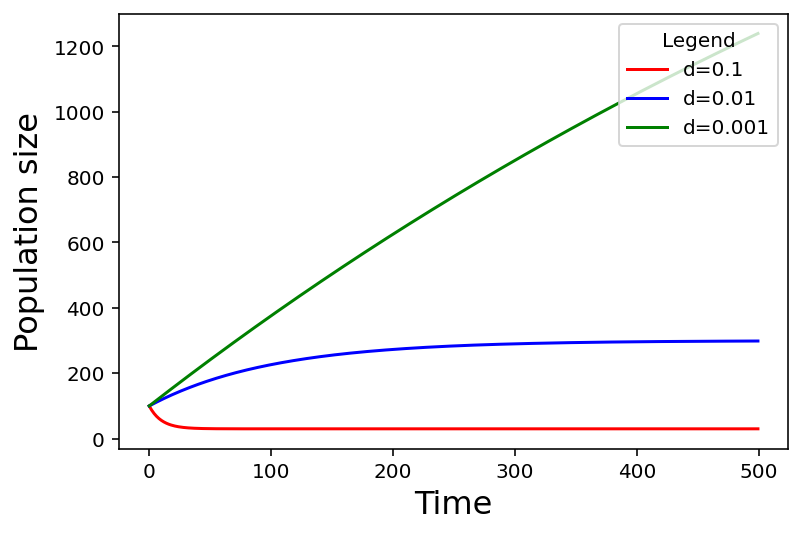

In [33]:
#steady state dy/dx = 0 so can solve to find an equation

def growth(t, x0, d):
    k=3
    dxdt = k - d * x0
    return [dxdt]

x0 = [100] # Initial value of the population
Tmax = 500                  # Maximum time
t_span = (0, Tmax)          # Time span of the simulation
t = np.arange(0, Tmax, 1)   # Times at which to store the solution
k=3


d = 0.1                     # Growth rate                
pop1 = solve_ivp(growth, t_span, x0, args=[d], t_eval=t)
print("The steady state when d=0.1 is:",k/d)
d = 0.01
pop2 = solve_ivp(growth, t_span, x0, args=[d], t_eval=t)
print("The steady state when d=0.01 is:",k/d)
d = 0.001
pop3 = solve_ivp(growth, t_span, x0, args=[d], t_eval=t)
print("The steady state when d=0.001 is:",k/d)


plt.plot(pop1.t, pop1.y[0], 'r', label="d=0.1")
plt.plot(pop2.t, pop2.y[0], 'b', label="d=0.01")
plt.plot(pop3.t, pop3.y[0], 'g', label="d=0.001")

plt.xlabel("Time", fontsize=16)
plt.ylabel("Population size", fontsize=16)
plt.legend(loc='upper right', title="Legend")

### Question 5
* For a production rate of 3 and a degradation rate of 0.01, plot the solution for different values of the initial RNA amount $X_0$. 
* Interpret the results.

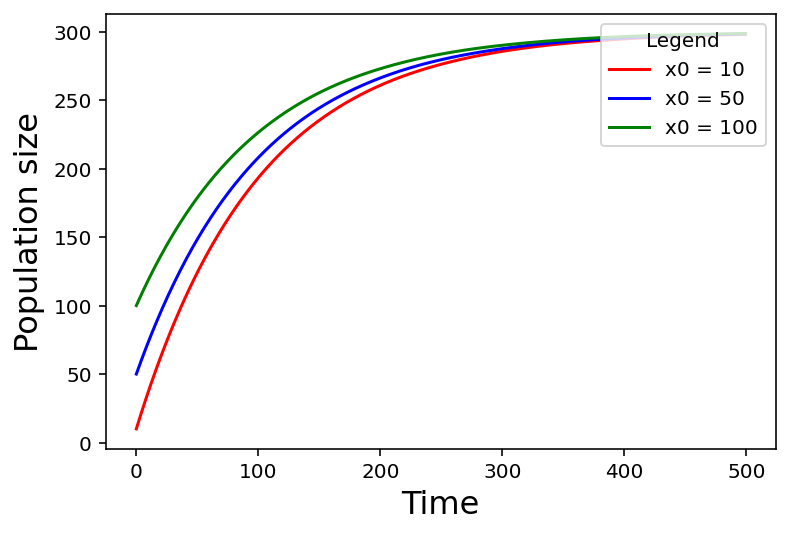

In [37]:
def growth(t, x0, d, k):
    dxdt = k - d * x0
    return [dxdt]

Tmax = 500                  # Maximum time
t_span = (0, Tmax)          # Time span of the simulation
t = np.arange(0, Tmax, 1)   # Times at which to store the solution
d=0.01
k=3

x0 = [10] # Initial value of the population
pop1 = solve_ivp(growth, t_span, x0, args=[d,k], t_eval=t)
x0 = [50] # Initial value of the population
pop2 = solve_ivp(growth, t_span, x0, args=[d,k], t_eval=t)
x0 = [100] # Initial value of the population
pop3 = solve_ivp(growth, t_span, x0, args=[d,k], t_eval=t)


plt.plot(pop1.t, pop1.y[0], 'r', label="x0 = 10")
plt.plot(pop2.t, pop2.y[0], 'b', label="x0 = 50")
plt.plot(pop3.t, pop3.y[0], 'g', label="x0 = 100")

plt.xlabel("Time", fontsize=16)
plt.ylabel("Population size", fontsize=16)
plt.legend(loc='upper right', title="Legend")

This shows that populations with a larger population size reach the steady state quicker. However all population sizes reach the same steady state
